# Семинар по Pytorch.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline

Установка: https://pytorch.org/get-started/locally/  
В этом ноутбуке будут разобраны основные особенности фреймворка Pytorch. Pytorch - это как Numpy, только умеет эффективно автоматически считать градиенты.

In [2]:
import torch

print(torch.__version__)

2.3.0


In [81]:
import torchvision
from torch import nn
import os
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

In [5]:
# проверить, доступна ли у вас cuda.
torch.cuda.is_available()

False

# Базовые операции

In [6]:
# numpy

x = np.arange(25).reshape(5, 5)

print("X :\n {}\n".format(x))
print("X.shape : {}\n ".format(x.shape))
print("Возвести в квадрат:\n {}\n".format(x * x))
print("X*X^T  :\n {}\n".format(np.matmul(x, x.T)))
print("Cреднее по столбцам :\n {}\n".format(np.mean(x, axis=0)))
print("Сумма по строкам:\n {}\n".format(np.cumsum(x, axis=1)))

X :
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

X.shape : (5, 5)
 
Возвести в квадрат:
 [[  0   1   4   9  16]
 [ 25  36  49  64  81]
 [100 121 144 169 196]
 [225 256 289 324 361]
 [400 441 484 529 576]]

X*X^T  :
 [[  30   80  130  180  230]
 [  80  255  430  605  780]
 [ 130  430  730 1030 1330]
 [ 180  605 1030 1455 1880]
 [ 230  780 1330 1880 2430]]

Cреднее по столбцам :
 [10. 11. 12. 13. 14.]

Сумма по строкам:
 [[  0   1   3   6  10]
 [  5  11  18  26  35]
 [ 10  21  33  46  60]
 [ 15  31  48  66  85]
 [ 20  41  63  86 110]]



In [7]:
# torch

x = torch.arange(25).reshape(5, 5).float()

print("X :\n {}\n".format(x))
print("X.shape : {}\n ".format(x.shape))
print("Возвести в квадрат:\n {}\n".format(x * x))
print("X*X^T  :\n {}\n".format(torch.matmul(x, x.T)))
print("Cреднее по столбцам :\n {}\n".format(torch.mean(x, axis=0)))
print("Сумма по строкам:\n {}\n".format(torch.cumsum(x, axis=1)))

X :
 tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.]])

X.shape : torch.Size([5, 5])
 
Возвести в квадрат:
 tensor([[  0.,   1.,   4.,   9.,  16.],
        [ 25.,  36.,  49.,  64.,  81.],
        [100., 121., 144., 169., 196.],
        [225., 256., 289., 324., 361.],
        [400., 441., 484., 529., 576.]])

X*X^T  :
 tensor([[  30.,   80.,  130.,  180.,  230.],
        [  80.,  255.,  430.,  605.,  780.],
        [ 130.,  430.,  730., 1030., 1330.],
        [ 180.,  605., 1030., 1455., 1880.],
        [ 230.,  780., 1330., 1880., 2430.]])

Cреднее по столбцам :
 tensor([10., 11., 12., 13., 14.])

Сумма по строкам:
 tensor([[  0.,   1.,   3.,   6.,  10.],
        [  5.,  11.,  18.,  26.,  35.],
        [ 10.,  21.,  33.,  46.,  60.],
        [ 15.,  31.,  48.,  66.,  85.],
        [ 20.,  41.,  63.,  86., 110.]])



# Pytorch - почти Numpy.
Вы можете создавать тензоры, смотреть на их градиенты, не создавая сессии как в tensorflow.
Названия методов очень похожи. Если они отличаются - загляните в таблицу: https://github.com/torch/torch7/wiki/Torch-for-Numpy-users


# Pytroch сам считает backpropagation для нас с помощью модуля autograd

In [8]:
# создаем тензор
preds = torch.zeros(5, requires_grad=True)

# вектор предсказаний
labels = torch.ones(5, requires_grad=True)

# loss: MAE
loss = torch.mean(torch.abs(labels - preds))

print(loss)

# запускаем backprop
loss.backward()

tensor(1., grad_fn=<MeanBackward0>)


In [9]:
# градиенты доступны в поле .grad:
preds.grad

tensor([-0.2000, -0.2000, -0.2000, -0.2000, -0.2000])

In [10]:
# градиенты можно занулить
preds.grad.zero_()

tensor([0., 0., 0., 0., 0.])

In [11]:
# теперь градиенты снова 0
preds.grad

tensor([0., 0., 0., 0., 0.])

###  Градиенты накапливаются при каждом вызове backward()

In [12]:
# создаем тензор
preds = torch.zeros(5, requires_grad=True)

# вектор предсказаний
labels = torch.ones(5, requires_grad=True)

# loss: MAE
loss = torch.mean(torch.abs(labels - preds))

print(loss)

# запускаем backprop
for i in range(5):
    loss.backward(retain_graph=True)
    print(i, preds.grad)

tensor(1., grad_fn=<MeanBackward0>)
0 tensor([-0.2000, -0.2000, -0.2000, -0.2000, -0.2000])
1 tensor([-0.4000, -0.4000, -0.4000, -0.4000, -0.4000])
2 tensor([-0.6000, -0.6000, -0.6000, -0.6000, -0.6000])
3 tensor([-0.8000, -0.8000, -0.8000, -0.8000, -0.8000])
4 tensor([-1., -1., -1., -1., -1.])


# Пишем свою логистическую регрессию на пайторче

In [13]:
from sklearn.datasets import make_blobs
import sklearn

X, y = make_blobs(
    n_samples=200,
    centers=((10, 5), (5, -5)),
    n_features=2,
    random_state=0,
    cluster_std=3,
)

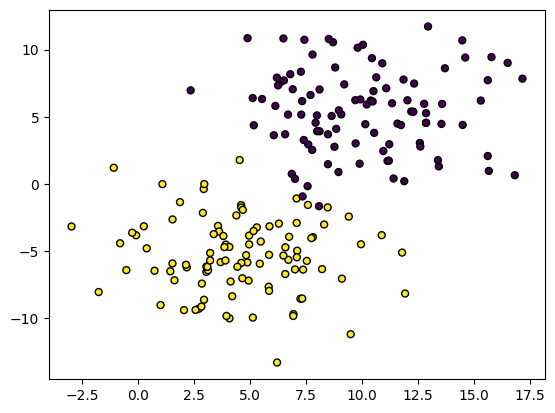

In [14]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

# Напоминание. Как это было в Sklearn:

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X, y)

LogisticRegression()

In [18]:
model.coef_

array([[-0.8841315 , -1.38568117]])

In [19]:
model.intercept_

array([5.78149723])

## Визуализируем разделяющую плоскость

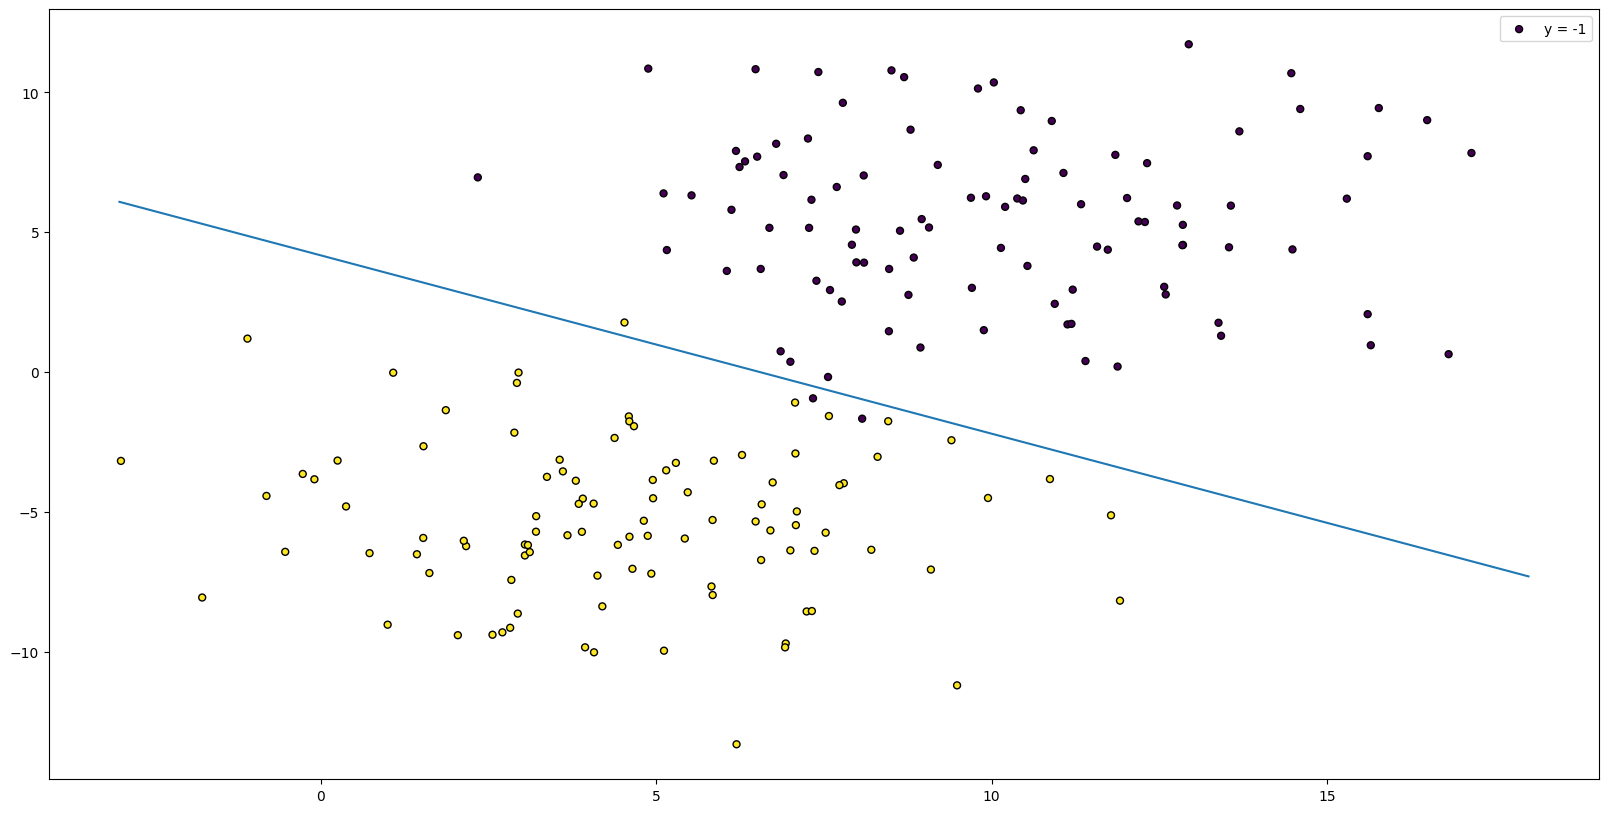

In [20]:
w_1 = model.coef_[0][0]
w_2 = model.coef_[0][1]
w_0 = model.intercept_[0]

plt.figure(figsize=(20, 10))
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.legend(["y = -1", "y = 1"])
x_arr = np.linspace(-3, 18, 1000)

y_arr = -(w_0 + w_1 * x_arr) / w_2
plt.plot(x_arr, y_arr)
plt.show()

# Pytorch

In [21]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=0, cluster_std=3)

In [22]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [23]:
X = torch.tensor(X)
y = torch.tensor(y)

In [24]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [25]:
print(X.shape, y.shape)

torch.Size([200, 2]) torch.Size([200])


In [26]:
len(X)

200

In [27]:
len(y)

200

# Напишем свою логистическую регрессию на пайторче

In [28]:
X, y = make_blobs(
    n_samples=200,
    centers=((10, 5), (5, -5)),
    n_features=2,
    random_state=0,
    cluster_std=3,
)

In [29]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [30]:
X = torch.tensor(X)
y = torch.tensor(y)

In [31]:
assert type(X) == torch.Tensor
assert type(y) == torch.Tensor

In [32]:
w = torch.zeros(2, requires_grad=True, dtype=torch.double)
b = torch.zeros(1, requires_grad=True, dtype=torch.double)

In [33]:
assert w.requires_grad
assert len(w.shape) == 1
assert w.shape[0] == X.shape[1]
assert w.dtype == X.dtype
assert b.requires_grad
assert len(b.shape) == 1
assert b.dtype == X.dtype

In [34]:
def binary_cross_entropy(y, y_predicted):
    """
    y: binary tensor, shape: N, example: [0, 1, 0, 1, 1]
    y_pred: tensor with values from 0 to 1. shape: N. example: [0.2, 0, 1, 0.75, 0.999]

    output: tensor, shape: N

    """
    return -(y * (torch.log(y_predicted)) + (1 - y) * torch.log(1 - y_predicted))

In [35]:
y_test = torch.tensor([1, 0, 1, 1])
y_pred = torch.tensor([0.7, 0.3, 0.5, 0.9])
bce_correct = torch.tensor([0.3567, 0.3567, 0.6931, 0.1054])
bce_predicted = binary_cross_entropy(y_test, y_pred)
assert bce_predicted.shape == y_test.shape
assert torch.allclose(bce_predicted, bce_correct, rtol=1e-03)

In [36]:
from IPython.display import clear_output

learning_rate = 0.00001
n_epoch = 1000

for i in range(n_epoch):
    y_pred = torch.matmul(X, w) + b
    y_pred = torch.sigmoid(y_pred)
    loss = binary_cross_entropy(y, y_pred)
    loss = torch.sum(loss)

    loss.backward()

    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

    # zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()

    if (i + 1) % 5 == 0:
        # if True:
        clear_output(True)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

        w_1 = w.data[0]
        w_2 = w.data[1]
        w_0 = b.data[0]

        x_arr = torch.linspace(-10, 20, 1000)
        plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
        plt.show()

        print("Iteration: {}, Loss: {}".format(i, loss))

KeyboardInterrupt: 

# Теперь все за нас делает пайторч

In [37]:
X, y = make_blobs(
    n_samples=200,
    centers=((10, 5), (5, -5)),
    n_features=2,
    random_state=0,
    cluster_std=3,
)

In [38]:
X = torch.tensor(X)
y = torch.tensor(y)

# Немного про оптимизаторы

![](https://mpopov.com/images/adam-animated.gif)

![](https://ml-cheatsheet.readthedocs.io/en/latest/_images/optimizers.gif)

![](https://images.viblo.asia/993c2fcc-ece4-41d8-bca7-5442e9ce3836.gif)

![](https://camo.githubusercontent.com/cccdc200cc2a3052ad9562f6f58ebd429d634fb1190a84b20db931e8ad4ffb8f/68747470733a2f2f692e737461636b2e696d6775722e636f6d2f316f6274562e676966)

# Инициализируем модель

In [39]:
model = torch.nn.Linear(2, 1)
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=0.1)

model.train()

Linear(in_features=2, out_features=1, bias=True)

In [40]:
model

Linear(in_features=2, out_features=1, bias=True)

In [41]:
model.weight

Parameter containing:
tensor([[ 0.3114, -0.1171]], requires_grad=True)

In [42]:
model.bias

Parameter containing:
tensor([-0.1662], requires_grad=True)

In [43]:
model.weight.data.dtype

torch.float32

In [44]:
from IPython.display import clear_output


for i in range(1000):
    # считаем предсказание
    y_pred = torch.sigmoid(model(X.float()))

    # считаем лосс
    loss = criterion(y_pred.flatten(), y.float())

    # прокидываем градиенты
    loss.backward()

    # делаем шаг оптимизатором
    optim.step()

    # зануляем градиенты
    optim.zero_grad()

    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

        w_1 = model.weight.data[0][0]
        w_2 = model.weight.data[0][1]
        w_0 = model.bias.data[0]

        x_arr = torch.linspace(-10, 20, 1000)
        plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
        plt.show()

        print("Iteration: {}, Loss: {}".format(i, loss))

KeyboardInterrupt: 

# Окей, пусть теперь проблема нелинейная

In [45]:
from sklearn.datasets import make_moons

In [46]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=17)

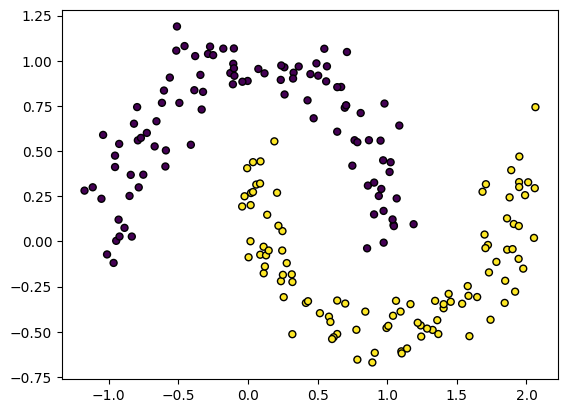

In [47]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

X = torch.tensor(X)
y = torch.tensor(y)

In [50]:
model = torch.nn.Linear(2, 1)
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

model.train()

Linear(in_features=2, out_features=1, bias=True)

In [51]:
from IPython.display import clear_output


for i in range(30000):

    y_pred = torch.sigmoid(model(X.float()))

    loss = criterion(y_pred.flatten(), y.float())

    loss.backward()

    optim.step()
    optim.zero_grad()

    if (i + 1) % 500 == 0:
        clear_output(True)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

        w_1 = model.weight.data[0][0]
        w_2 = model.weight.data[0][1]
        w_0 = model.bias.data[0]

        x_arr = torch.linspace(-2, 2, 1000)
        plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
        plt.show()

        print("Iteration: {}, Loss: {}".format(i, loss))

KeyboardInterrupt: 

# Визуализируем разделяющую плоскость

In [52]:
h = 0.02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
model.eval()
Z = torch.sigmoid(model(input_tensor))
Z = Z.reshape(xx.shape)

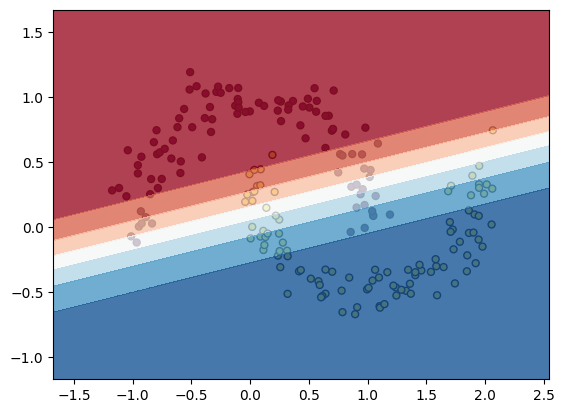

In [53]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=0.8)

plt.show()

# Делаем модель сложнее

/var/folders/tf/4vf66cxs0f747m9rb3jpvyhc0000gn/T/ipykernel_29362/635060750.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X)
/var/folders/tf/4vf66cxs0f747m9rb3jpvyhc0000gn/T/ipykernel_29362/635060750.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


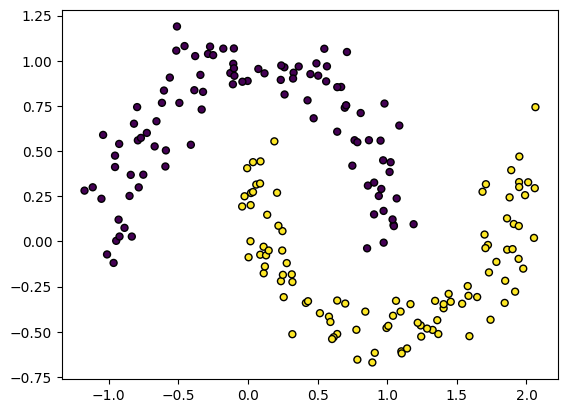

In [54]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

X = torch.tensor(X)
y = torch.tensor(y)

In [55]:
from torch import nn

# Cоберите двуслойную модель

In [93]:
model = nn.Sequential()
model.add_module("first", nn.Linear(2, 2))
model.add_module("first_activation", nn.Sigmoid())
model.add_module("second", nn.Linear(2, 2))

In [91]:
criterion = torch.nn.CrossEntropyLoss()

optim = torch.optim.SGD(model.parameters(), lr=2.0)

model.train()

Sequential(
  (first): Linear(in_features=2, out_features=2, bias=True)
  (first_activation): LogSigmoid()
  (second): Linear(in_features=2, out_features=2, bias=True)
)

In [94]:
from IPython.display import clear_output


h = 0.02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


model.train()
for i in range(30000):

    y_pred = torch.sigmoid(model(X.float()))

    loss = criterion(y_pred.flatten(), y.float())

    loss.backward()

    optim.step()
    optim.zero_grad()
    if (i + 1) % 500 == 0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = torch.sigmoid(model(input_tensor))
        Z = Z.reshape(xx.shape)

        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=0.8)

        plt.show()

        print("Iteration: {}, Loss: {}".format(i, loss))

RuntimeError: size mismatch (got input: [400], target: [200])

# Усложним модель (увеличим количество слоев)

In [69]:
model = nn.Sequential()
model.add_module("first", nn.Linear(2, 2))
model.add_module("first_activation", nn.Sigmoid())
model.add_module("second", nn.Linear(2, 2))
model.add_module("second_activation", nn.Sigmoid())
model.add_module("third", nn.Linear(2, 1))

In [70]:
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=2.0, momentum=0.9)

model.train()

Sequential(
  (first): Linear(in_features=2, out_features=2, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=2, out_features=2, bias=True)
  (second_activation): Sigmoid()
  (third): Linear(in_features=2, out_features=1, bias=True)
)

tensor([[9.1127e-01],
        [9.9949e-01],
        [9.9857e-01],
        [9.6633e-01],
        [6.0876e-01],
        [4.1531e-08],
        [1.2498e-08],
        [2.1553e-08],
        [2.3180e-08],
        [9.9896e-01],
        [1.5328e-08],
        [5.4636e-07],
        [9.9652e-01],
        [5.5054e-01],
        [9.9334e-01],
        [7.0858e-01],
        [9.7860e-01],
        [6.1556e-01],
        [2.6784e-08],
        [5.4457e-01],
        [9.7865e-01],
        [9.7153e-01],
        [5.8898e-01],
        [6.9396e-01],
        [6.2216e-06],
        [9.9734e-01],
        [9.9434e-01],
        [4.4762e-01],
        [1.2131e-08],
        [6.8722e-01],
        [1.8271e-08],
        [9.7166e-01],
        [9.9584e-01],
        [7.6016e-09],
        [1.0088e-08],
        [9.9276e-01],
        [1.0781e-08],
        [9.9826e-01],
        [7.3625e-09],
        [9.9948e-01],
        [6.6227e-01],
        [3.3720e-01],
        [4.4630e-01],
        [9.9953e-01],
        [8.4058e-01],
        [2

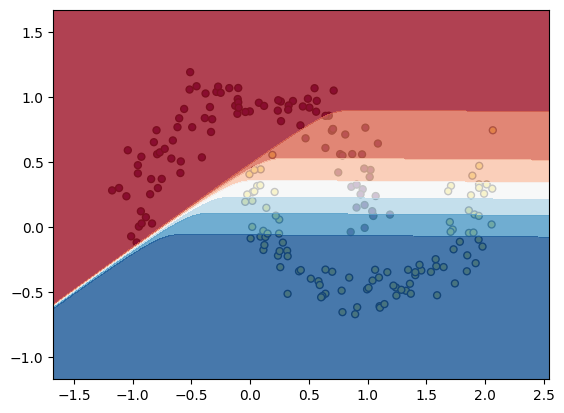

Iteration: 29999, Loss: 0.21919162571430206


In [70]:
from IPython.display import clear_output


h = 0.02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


model.train()
for i in range(30000):

    y_pred = torch.sigmoid(model(X.float()))

    loss = criterion(y_pred.flatten(), y.float())

    loss.backward()

    optim.step()

    optim.zero_grad()
    
    if (i + 1) % 500 == 0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = torch.sigmoid(model(input_tensor))
        Z = Z.reshape(xx.shape)
        print(y_pred)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=0.8)


        plt.show()

        print("Iteration: {}, Loss: {}".format(i, loss))

# Еще усложним модель (увеличим размерность скрытых слоев)

In [78]:
model = nn.Sequential()
model.add_module("first", nn.Linear(2, 5))
model.add_module("first_activation", nn.Sigmoid())
model.add_module("second", nn.Linear(5, 5))
model.add_module("second_activation", nn.Sigmoid())
model.add_module("third", nn.Linear(5, 2))
model.add_module("third_activation", nn.Sigmoid())

In [79]:
criterion = torch.nn.BCELoss()

optim = torch.optim.SGD(model.parameters(), lr=2, momentum=0.9)

model.train()

# model.to('cuda:2')

Sequential(
  (first): Linear(in_features=2, out_features=5, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=5, out_features=5, bias=True)
  (second_activation): Sigmoid()
  (third): Linear(in_features=5, out_features=2, bias=True)
  (third_activation): Sigmoid()
)

In [80]:
from IPython.display import clear_output


h = 0.02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


model.train()
for i in range(3000):

    y_pred = model(X.float())

    loss = criterion(y_pred.flatten(), y.float())

    loss.backward()

    optim.step()
    optim.zero_grad()
    if (i + 1) % 50 == 0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = torch.sigmoid(model(input_tensor))
        Z = Z.reshape(xx.shape)
        
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=0.8)

        plt.show()

        print("Iteration: {}, Loss: {}".format(i, loss))

ValueError: Using a target size (torch.Size([200])) that is different to the input size (torch.Size([400])) is deprecated. Please ensure they have the same size.

# Сделаем > 2 классов

In [75]:
from sklearn.datasets import make_circles

In [111]:
# blobs with varied variances
X, y = make_blobs(n_samples=400,centers=4, cluster_std=[1.0, 1.5, 0.5, 0.75], random_state=1334)

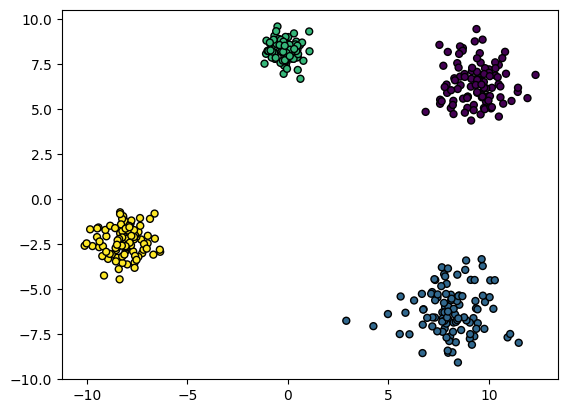

In [112]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

X = torch.tensor(X)
y = torch.tensor(y)

In [116]:
model = nn.Sequential()
model.add_module("first", nn.Linear(2, 10))
model.add_module("first_activation", nn.Sigmoid())
model.add_module("second", nn.Linear(10, 10))
model.add_module("second_activation", nn.Sigmoid())
model.add_module("third", nn.Linear(10, 4))

In [117]:
criterion = torch.nn.CrossEntropyLoss()

optim = torch.optim.SGD(model.parameters(), lr=0.1)

model.train()

Sequential(
  (first): Linear(in_features=2, out_features=10, bias=True)
  (first_activation): Sigmoid()
  (second): Linear(in_features=10, out_features=10, bias=True)
  (second_activation): Sigmoid()
  (third): Linear(in_features=10, out_features=4, bias=True)
)

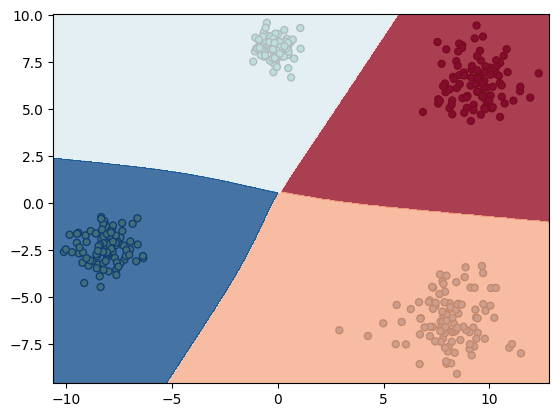

Iteration: 999, Loss: 0.03663351386785507


In [118]:
from IPython.display import clear_output


h = 0.02  # step size in the mesh
cm = plt.cm.RdBu
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

model.train()
for i in range(1000):

    y_pred = model(X.float())

    loss = criterion(y_pred, y.long())

    loss.backward()

    optim.step()
    optim.zero_grad()
    if (i + 1) % 25 == 0:
        clear_output(True)
        input_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
        Z = model(input_tensor)
        Z = torch.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)

        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

        plt.contourf(xx, yy, Z.detach().numpy(), cmap=cm, alpha=0.8)

        plt.show()

        print("Iteration: {}, Loss: {}".format(i, loss))

# Реальные данные

In [121]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize, Lambda

# 1. Грузим данные

In [122]:
data_folderpath = "../../data"
training_data = datasets.FashionMNIST(
    root=data_folderpath, train=True, download=True, transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root=data_folderpath, train=False, download=True, transform=ToTensor()
)

100.0%


Extracting ../../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../../data/FashionMNIST/raw



100.0%


Extracting ../../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../../data/FashionMNIST/raw



100.0%


Extracting ../../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/FashionMNIST/raw



100.0%

Extracting ../../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/FashionMNIST/raw



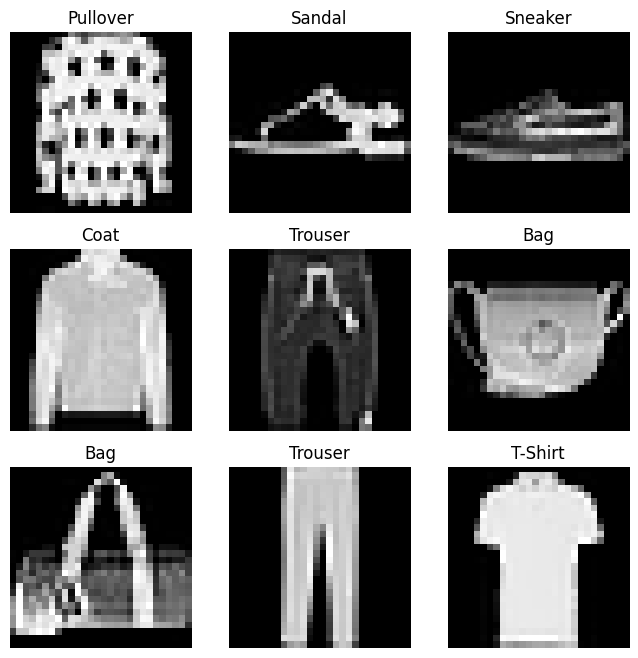

In [123]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [124]:
X_sample, y_sample = training_data[0]
print(X_sample)
print(y_sample)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [125]:
X_sample.shape

torch.Size([1, 28, 28])

# Создаем собственный датасет

In [126]:
import pandas as pd
import numpy as np


class CustomImageDataset(Dataset):
    def __init__(self, data_file, transform=None, target_transform=None):
        self.data = pd.read_csv(data_file)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        image = self.data.iloc[idx, 1:].values.reshape(28, 28).astype(np.uint8)
        label = self.data.iloc[idx, 0]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [127]:
train_data_url = "https://media.githubusercontent.com/media/fpleoni/fashion_mnist/master/fashion-mnist_train.csv"
test_data_url = "https://media.githubusercontent.com/media/fpleoni/fashion_mnist/master/fashion-mnist_test.csv"

In [128]:
train = CustomImageDataset(
    train_data_url,
    transform=ToTensor(),
    target_transform=Lambda(
        lambda y: torch.zeros(10, dtype=torch.float).scatter_(
            0, torch.tensor(y), value=1
        )
    ),
)
test = CustomImageDataset(
    test_data_url,
    transform=ToTensor(),
    target_transform=Lambda(
        lambda y: torch.zeros(10, dtype=torch.float).scatter_(
            0, torch.tensor(y), value=1
        )
    ),
)

In [129]:
X_sample, y_sample = train[0]

In [130]:
X_sample

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.2431, 0.2392, 0.0824, 0.1137, 0.0902, 0.2000,
          0.5333, 0.2392, 0.0000, 0.0000, 0.0000, 0.0000,

In [131]:
X_sample.shape

torch.Size([1, 28, 28])

In [132]:
y_sample

tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [133]:
y_sample.shape

torch.Size([10])

# Познаем даталоадеры

In [134]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64, 10])


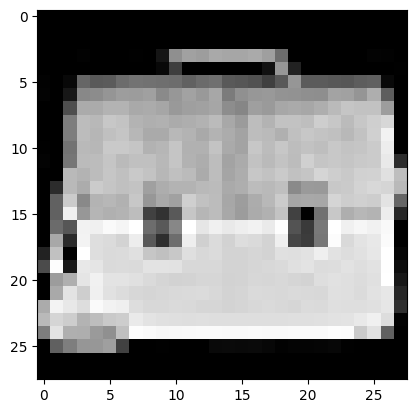

Label: tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])


In [158]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# 2. Собираем нейросеть

In [136]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [137]:
from torch import nn


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [138]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [139]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([1])


# Смотрим детально в слои сети

In [140]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


In [141]:
input_image

tensor([[[0.0219, 0.3704, 0.2268,  ..., 0.6934, 0.7655, 0.4399],
         [0.9856, 0.7666, 0.8594,  ..., 0.2134, 0.0631, 0.6948],
         [0.7902, 0.9598, 0.7295,  ..., 0.1045, 0.6654, 0.5559],
         ...,
         [0.8410, 0.4751, 0.0879,  ..., 0.5953, 0.2463, 0.7103],
         [0.5023, 0.4562, 0.1870,  ..., 0.3219, 0.4482, 0.4323],
         [0.6533, 0.2577, 0.0628,  ..., 0.1621, 0.8759, 0.2597]],

        [[0.9621, 0.3007, 0.5212,  ..., 0.9486, 0.6668, 0.8591],
         [0.8665, 0.2248, 0.4617,  ..., 0.0414, 0.3520, 0.7209],
         [0.1777, 0.5132, 0.6291,  ..., 0.3581, 0.8148, 0.7038],
         ...,
         [0.9202, 0.6998, 0.8242,  ..., 0.3325, 0.4439, 0.5229],
         [0.8063, 0.7410, 0.2868,  ..., 0.1582, 0.5647, 0.0575],
         [0.4159, 0.6015, 0.6193,  ..., 0.0365, 0.1438, 0.3026]],

        [[0.1242, 0.3643, 0.5605,  ..., 0.6317, 0.0848, 0.8911],
         [0.5339, 0.4574, 0.3160,  ..., 0.0983, 0.6681, 0.8585],
         [0.0927, 0.5147, 0.6505,  ..., 0.7881, 0.1232, 0.

In [142]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [143]:
flat_image

tensor([[0.0219, 0.3704, 0.2268,  ..., 0.1621, 0.8759, 0.2597],
        [0.9621, 0.3007, 0.5212,  ..., 0.0365, 0.1438, 0.3026],
        [0.1242, 0.3643, 0.5605,  ..., 0.7820, 0.6125, 0.3609]])

In [144]:
layer1 = nn.Linear(in_features=28 * 28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [145]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.5732,  0.4829, -0.0126,  0.4236, -0.0444, -0.4470, -0.3553,  0.0155,
          0.4957, -0.4521,  0.2467,  0.4085, -0.1273,  0.3170, -0.5617,  0.0551,
          0.4526,  0.1207, -0.0368,  0.1467],
        [-0.2484,  0.4443, -0.1474,  0.1984, -0.1896, -0.3108, -0.5212,  0.2412,
          0.5315, -0.5699,  0.0944,  0.4244, -0.0458,  0.6710, -0.8208,  0.2270,
         -0.0308,  0.1023,  0.2581, -0.0430],
        [-0.2966,  0.1845,  0.2015,  0.1445, -0.0694, -0.1003, -0.3430,  0.4859,
          0.5436, -0.3511,  0.2742,  0.6354, -0.0590,  0.2387, -0.5505, -0.0660,
         -0.0589,  0.1100,  0.1754, -0.1453]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.4829, 0.0000, 0.4236, 0.0000, 0.0000, 0.0000, 0.0155, 0.4957,
         0.0000, 0.2467, 0.4085, 0.0000, 0.3170, 0.0000, 0.0551, 0.4526, 0.1207,
         0.0000, 0.1467],
        [0.0000, 0.4443, 0.0000, 0.1984, 0.0000, 0.0000, 0.0000, 0.2412, 0.5315,
         0.0000, 0.0944, 0.4244, 0.0000, 0.6710, 0.00

In [146]:
seq_modules = nn.Sequential(flatten, layer1, nn.ReLU(), nn.Linear(20, 10))
input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

In [147]:
logits.shape

torch.Size([3, 10])

In [148]:
logits

tensor([[ 0.3572, -0.0975, -0.2269,  0.2348, -0.0730,  0.0008,  0.0099,  0.0915,
         -0.0644, -0.3227],
        [ 0.2529, -0.0378, -0.2795,  0.2883, -0.1698, -0.0441, -0.0067,  0.1664,
         -0.1057, -0.1601],
        [ 0.3467, -0.1282, -0.1906,  0.0312, -0.1937,  0.1457, -0.0175,  0.1499,
          0.0166, -0.2339]], grad_fn=<AddmmBackward0>)

In [149]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab

tensor([[0.1416, 0.0898, 0.0789, 0.1253, 0.0921, 0.0991, 0.1000, 0.1085, 0.0929,
         0.0717],
        [0.1279, 0.0956, 0.0751, 0.1325, 0.0838, 0.0950, 0.0987, 0.1173, 0.0894,
         0.0846],
        [0.1402, 0.0872, 0.0819, 0.1023, 0.0817, 0.1147, 0.0974, 0.1152, 0.1008,
         0.0785]], grad_fn=<SoftmaxBackward0>)

In [150]:
pred_probab.argmax(dim=1)

tensor([0, 3, 0])

In [151]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0045,  0.0146,  0.0042,  ..., -0.0312,  0.0304, -0.0209],
        [ 0.0179, -0.0354, -0.0295,  ..., -0.0132,  0.0034,  0.0057]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0057, -0.0117], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0215, -0.0343, -0.0379,  ..., -0.0187, -0.0314, -0.0082],
        [-0.0278, -0.0206, -0.0386,  ...,  0.0029, -0.0107, -0.0260]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

# 3. Тренируем сеть

#### Инициализируем модель

In [152]:
model = NeuralNetwork()

#### Инициализируем параметры

In [153]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

#### Инициализируем функцию потерь

In [154]:
loss_fn = nn.CrossEntropyLoss()

#### Инициализируем оптимизатор

In [155]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Описываем функции тренировки и тестирования модели

In [156]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(
        f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n"
    )

In [157]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.306811  [    0/60000]
loss: 2.296082  [ 6400/60000]
loss: 2.280512  [12800/60000]
loss: 2.268106  [19200/60000]
loss: 2.246543  [25600/60000]
loss: 2.240868  [32000/60000]
loss: 2.229113  [38400/60000]
loss: 2.198046  [44800/60000]
loss: 2.177003  [51200/60000]
loss: 2.177958  [57600/60000]
Test Error: 
 Accuracy: 48.6%, Avg loss: 2.171020 

Epoch 2
-------------------------------
loss: 2.157982  [    0/60000]
loss: 2.171033  [ 6400/60000]
loss: 2.118707  [12800/60000]
loss: 2.117049  [19200/60000]
loss: 2.106267  [25600/60000]
loss: 2.090114  [32000/60000]
loss: 2.080660  [38400/60000]
loss: 2.054120  [44800/60000]
loss: 1.977387  [51200/60000]
loss: 1.961590  [57600/60000]
Test Error: 
 Accuracy: 58.9%, Avg loss: 1.930122 

Epoch 3
-------------------------------
loss: 1.909502  [    0/60000]
loss: 1.900595  [ 6400/60000]
loss: 1.872778  [12800/60000]
loss: 1.779668  [19200/60000]
loss: 1.814380  [25600/60000]
loss: 1.711893  [32000/600

# Весь материал ниже считаем факультативным

---

# 4. Изучаем свертки

![](https://distillery.com/wp-content/uploads/3-1.png)

![](https://wikidocs.net/images/page/164365/Fig_04_cnn_filter.png)

![](https://blog.kakaocdn.net/dn/lgBRU/btqWWtkNJhM/DsJwc0PXrbhS0n33Vqzgm1/img.gif)

![](https://www.mobiquity.com/hs-fs/hubfs/CNN03.gif?width=640&name=CNN03.gif)

![](https://i.stack.imgur.com/9bi5k.gif)

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import cv2
import sklearn
import PIL
import torch
import torchvision


def show_image(image, figsize=(16, 9), reverse=True):
    plt.figure(figsize=figsize)
    if reverse:
        plt.imshow(image[..., ::-1])
    else:
        plt.imshow(image)
    plt.axis("off")
    plt.show()


def show_grayscale_image(image, figsize=(16, 9)):
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap="gray")
    plt.axis("off")
    plt.show()

In [ ]:
layer = torch.nn.Conv2d(1, 1, kernel_size=(3, 3))
layer.weight

In [ ]:
# вес доступен через .weight.data
layer.weight.data = torch.ones_like(layer.weight.data)
layer.weight.data /= torch.sum(layer.weight.data)
layer.weight.data

In [ ]:
layer.bias.data = torch.zeros_like(layer.bias.data)
layer.bias.data

In [ ]:
layer.train()
layer.eval()

In [ ]:
input_tensor = torch.arange(9).reshape(1, 1, 3, 3)
input_tensor.shape

1 - размер батча 1 - кол-во каналов (1, если черно-белый, 3, если цветной) 3 - высота 3 - ширина

In [ ]:
input_tensor

In [ ]:
output_tensor = layer(input_tensor.float())

In [ ]:
output_tensor

## Какие бывают фильтры

In [ ]:
from urllib.request import urlopen


req = urlopen(
    "https://images.unsplash.com/photo-1608848461950-0fe51dfc41cb?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxleHBsb3JlLWZlZWR8M3x8fGVufDB8fHx8&w=1000&q=80"
)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, 0)

In [ ]:
img.shape

In [ ]:
show_grayscale_image(img)

In [ ]:
to_tensor = torchvision.transforms.ToTensor()
img_tensor = to_tensor(img)
img_tensor

In [ ]:
img_tensor.shape

In [ ]:
# делаем так, чтобы нейросеть могла считать изображение

img_tensor = img_tensor.reshape((1, 1, 1500, 1000))

In [ ]:
kernel_size = 50
layer = torch.nn.Conv2d(1, 1, kernel_size=kernel_size)

# обновляем веса свертки

layer.weight.data = torch.ones_like(layer.weight.data)
layer.weight.data /= torch.sum(layer.weight.data)

In [ ]:
layer.weight.data

In [ ]:
output_tensor = layer(img_tensor)
output_tensor.shape

In [ ]:
import torchvision.transforms as transforms

# функция, переводящее тензор в PIL-изображение
to_pil_image = transforms.ToPILImage()
output_img = to_pil_image(output_tensor.squeeze(0))

In [ ]:
show_grayscale_image(output_img)

In [ ]:
def show_image_with_kernel(img_input, kernel):
    layer = torch.nn.Conv2d(1, 1, kernel_size=3)
    layer.weight.data = our_kernel.reshape(1, 1, 3, 3)
    output_tensor = layer(img_input)
    output_img = to_pil_image(output_tensor.squeeze(0))
    show_grayscale_image(output_img)

In [ ]:
our_kernel = torch.tensor([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=torch.float32)
our_kernel = our_kernel.reshape(1, 1, 3, 3)
show_image_with_kernel(img_tensor, our_kernel)

In [ ]:
our_kernel = torch.tensor(
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype=torch.float32
)
our_kernel = our_kernel.reshape(1, 1, 3, 3)
show_image_with_kernel(img_tensor, our_kernel)

In [ ]:
our_kernel = torch.tensor([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=torch.float32)
our_kernel = our_kernel.reshape(1, 1, 3, 3)
show_image_with_kernel(img_tensor, our_kernel)

In [ ]:
our_kernel = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=torch.float32)
our_kernel = our_kernel.reshape(1, 1, 3, 3)
show_image_with_kernel(img_tensor, our_kernel)

In [ ]:
our_kernel = torch.tensor([[1, 0, 1], [0, 1, 0], [1, 0, 1]], dtype=torch.float32)
our_kernel = our_kernel.reshape(1, 1, 3, 3)
show_image_with_kernel(img_tensor, our_kernel)

![](https://miro.medium.com/v2/resize:fit:738/0*4tHPDjvQXX9obrhK.gif)

![](https://qph.cf2.quoracdn.net/main-qimg-c05ec72225e19614f0cc10385d27525c)

![](https://blog.ca.meron.dev/images/Convolution.gif)

![](https://i.stack.imgur.com/ptDPZ.gif)

![](https://lukeguerdan.com/assets/img/TCNfigureA.png)

![](https://theaisummer.com/static/490be17ee7f19b78003c3fdf5a6bbafc/83b75/receptive-field-in-convolutional-networks.png)

![](https://i.ytimg.com/vi/KuXjwB4LzSA/maxresdefault.jpg)

![](https://saturncloud.io/images/blog/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way.jpg)

![](https://learnopencv.com/wp-content/uploads/2023/01/tensorflow-keras-cnn-vgg-architecture-1024x611.png)

![](https://nico-curti.github.io/NumPyNet/NumPyNet/images/maxpool.gif)

Визуализация сверточных слоев https://distill.pub/2017/feature-visualization/

# Теперь пора писать свою сверточную нейросеть

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [ ]:
batch_size = 4

# dataset задаёт данные
trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
# dataloader подгружает их
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    # убрать нормализацию
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# взять случайный батч изображений
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print("  ".join("{}".format(classes[labels[j]]) for j in range(4)))

In [ ]:
def train_model(net, criterion, optimizer, trainloader, num_epochs=5):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            # Давайте сами напишем код тут

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 2000 == 1999:
                print(
                    "Epoch {0}/{1}, iteration {2}, loss: {3:.3f}".format(
                        epoch + 1, num_epochs, i + 1, running_loss / 2000
                    )
                )
                running_loss = 0.0
        print()

    print("Finished Training")

    return net

In [ ]:
def all_accuracy(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(
        "Accuracy of the network on the 10000 test images: {} %".format(
            100 * correct / total
        )
    )

In [ ]:
def class_accuracy(net, testloader):
    class_correct = list(0.0 for i in range(10))
    class_total = list(0.0 for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(10):
        print(
            "Accuracy of {} : {} %".format(
                classes[i], 100 * class_correct[i] / class_total[i]
            )
        )

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class FeedForwardNet(nn.Module):
    def __init__(self):
        super(FeedForwardNet, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x


net = FeedForwardNet()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
net = train_model(net, criterion, optimizer, trainloader, num_epochs=5)

In [ ]:
all_accuracy(net, testloader)

In [ ]:
class_accuracy(net, testloader)

## Свёрточная сеть для классификации

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
net = train_model(net, criterion, optimizer, trainloader, num_epochs=5)

In [ ]:
# сохраним сеть
PATH = "./cifar_net.pth"
torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(
    "GroundTruth: ",
    " ".join("{}".format(classes[labels[j]]) for j in range(batch_size)),
)

In [ ]:
# загрузим сеть
net_loaded = Net()
net_loaded.load_state_dict(torch.load(PATH))

In [ ]:
outputs = net_loaded(images)
_, predicted = torch.max(outputs, 1)

print("Predicted: ", " ".join("{}".format(classes[predicted[j]]) for j in range(4)))

In [ ]:
all_accuracy(net, testloader)

In [ ]:
class_accuracy(net, testloader)